Probability

Best-of-n series

Suppose you are playing some game and your winning percentage is $p$, then which format of series will be in more favor to you: best-of-3 or best-of-8?

To take the best-of-3 series, you need to win 2 games, to take the best-of-8 series, you need to win 5 games.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
def nCk(n,k):
    f = math.factorial
    return f(n) / f(k) / f(n-k)

In [3]:
def bestOf3(p):
    return np.power(p,2) + p * nCk(2,1) * p * (1-p)


In [4]:
def bestOf8(p):
    prob = np.power(p, 5)
    for l in range(5, 9, 1):
        prob += p * nCk(l, 4) * np.power(p, 4) * np.power((1-p), l-4)
    return prob

In [5]:
ps = np.arange(0, 1, 0.01)
bestOf3_probs = [bestOf3(p) for p in ps]
bestOf8_probs = [bestOf8(p) for p in ps]

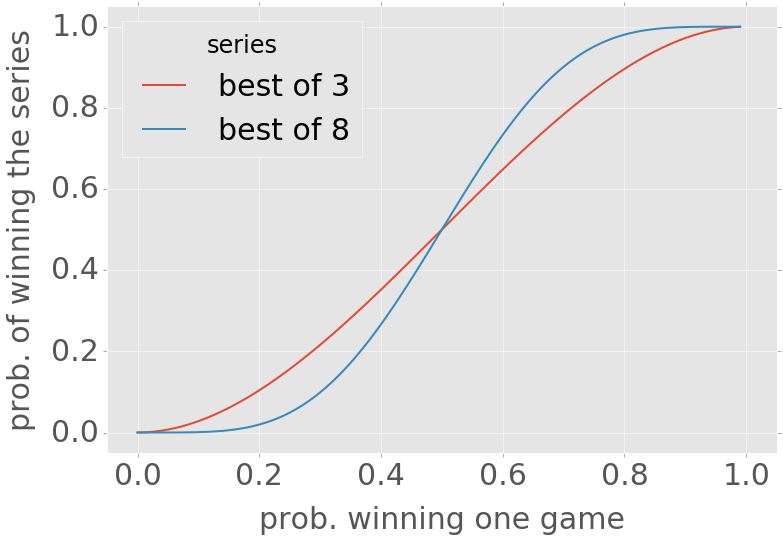

In [9]:
XMIN = -0.05
XMAX = 1.05
YMIN = -0.05
YMAX = 1.05
FONTSIZE = 30
plt.close('all')
fig, ax = plt.subplots(1, figsize=(12, 8))
b3, = ax.plot(ps, bestOf3_probs, lw=2)
b8, = ax.plot(ps, bestOf8_probs, lw=2)
l = plt.legend((b3, b8), ('best of 3', 'best of 8'), loc='best', fontsize=FONTSIZE, title='series')
l.get_title().set_fontsize(FONTSIZE*0.8)
ax.set_xlim(XMIN, XMAX)
ax.set_ylim(YMIN, YMAX)
ax.xaxis.set_ticks(np.arange(0, XMAX, 0.2))
ax.yaxis.set_ticks(np.arange(0, YMAX, 0.2))
ax.set_xlabel('prob. of winning one game', fontsize=FONTSIZE, labelpad=15)    
ax.set_ylabel('prob. of winning the series', fontsize=FONTSIZE, labelpad=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE) 
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE) 
    tick.label.set_rotation(0)  